## 퍼셉트론 초기화

퍼셉트론에 필요한 파라미터 변수를 무작위로 초기화하자
- 입력값: X
- 가중치: W
- 편향치: b
- 목표값: -1

In [91]:
import numpy as np

np.random.seed(42)

X = np.array([0.5, 0.5, 0.5])  # 입력값 = [0.5, 0.5, 0.5]
W = np.random.rand(3)  # 가중치 3개 무작위 초기화
b = np.random.rand(1)  # 편향치 1개 무작위 초기화
y = np.array([-1])  # 목표값 = -1

In [92]:
print("퍼셉트론 파라미터 초기값...")
print("W:", W)
print("b:", b)

퍼셉트론 파라미터 초기값...
W: [0.37454012 0.95071431 0.73199394]
b: [0.59865848]


## 예측 함수
입력값을 가중치와 곱하고 편향치와 더하여 출력값 z를 계산하고,
임계 함수에 통과시켜 예측값 y^을 도출하는 함수를 구현하자


In [93]:
# 예측 함수
def predict(X, W, b):
    z = np.dot(X, W) + b
    return z


# 임계 함수
def threshold(z):
    if z > 0:
        return np.array([1])
    else:
        return np.array([-1])


# 순전파 함수
def forward(X, W, b):
    z = predict(X, W, b)
    y_hat = threshold(z)
    return y_hat

In [94]:
z = predict(X, W, b)
y_hat = threshold(z)
print("출력값 z =", z)
print("예측값 y^ =", y_hat)
print("목표값 y =", y)

출력값 z = [1.62728267]
예측값 y^ = [1]
목표값 y = [-1]


## 학습 구현
모델의 가중치와 편향을 조절하여 예측 성능을 최적화하는 학습을 구현해보자


In [95]:
learning_rate = 0.1
num_epochs = 10

for epoch in range(num_epochs):
    y_hat = forward(X, W, b)
    error = y - y_hat
    W = W + learning_rate * error * X
    b = b + learning_rate * error
    print(f"[Epoch #{epoch + 1}] Error = {error}, W = {W}, b = {b}")

[Epoch #1] Error = [-2], W = [0.27454012 0.85071431 0.63199394], b = [0.39865848]
[Epoch #2] Error = [-2], W = [0.17454012 0.75071431 0.53199394], b = [0.19865848]
[Epoch #3] Error = [-2], W = [0.07454012 0.65071431 0.43199394], b = [-0.00134152]
[Epoch #4] Error = [-2], W = [-0.02545988  0.55071431  0.33199394], b = [-0.20134152]
[Epoch #5] Error = [-2], W = [-0.12545988  0.45071431  0.23199394], b = [-0.40134152]
[Epoch #6] Error = [0], W = [-0.12545988  0.45071431  0.23199394], b = [-0.40134152]
[Epoch #7] Error = [0], W = [-0.12545988  0.45071431  0.23199394], b = [-0.40134152]
[Epoch #8] Error = [0], W = [-0.12545988  0.45071431  0.23199394], b = [-0.40134152]
[Epoch #9] Error = [0], W = [-0.12545988  0.45071431  0.23199394], b = [-0.40134152]
[Epoch #10] Error = [0], W = [-0.12545988  0.45071431  0.23199394], b = [-0.40134152]


In [96]:
z = predict(X, W, b)
y_hat = forward(X, W, b)
print("Trained weights:", W)
print("Trained bias:", b)
print("Trained z:", z)
print("Predict y^:", y_hat)

Trained weights: [-0.12545988  0.45071431  0.23199394]
Trained bias: [-0.40134152]
Trained z: [-0.12271733]
Predict y^: [-1]


## 작동 원리
퍼셉트론은 주어진 데이터 $X$를 1차원 예측값 $y$로 변환하는 단순한 연산을 수행한다.
3차원 특징 공간을 어떻게 변환해야 예측값을 잘 만드는지 찾아내는 것이 학습 목표이다.

![](resources/perceptron.png)

$$
\begin{align*}
z &= \sum_{i=1}^3{w_i x_i} + b
\\\
&= \mathbf{w}^\intercal \mathbf{x} + b
\\\
y &= \phi(z)
\end{align*}
$$

## 결정 평면
모델의 가중치 $W$를 3차원 공간에서 해석하면 이진 분류기 결정평면을 관찰할 수 있다.

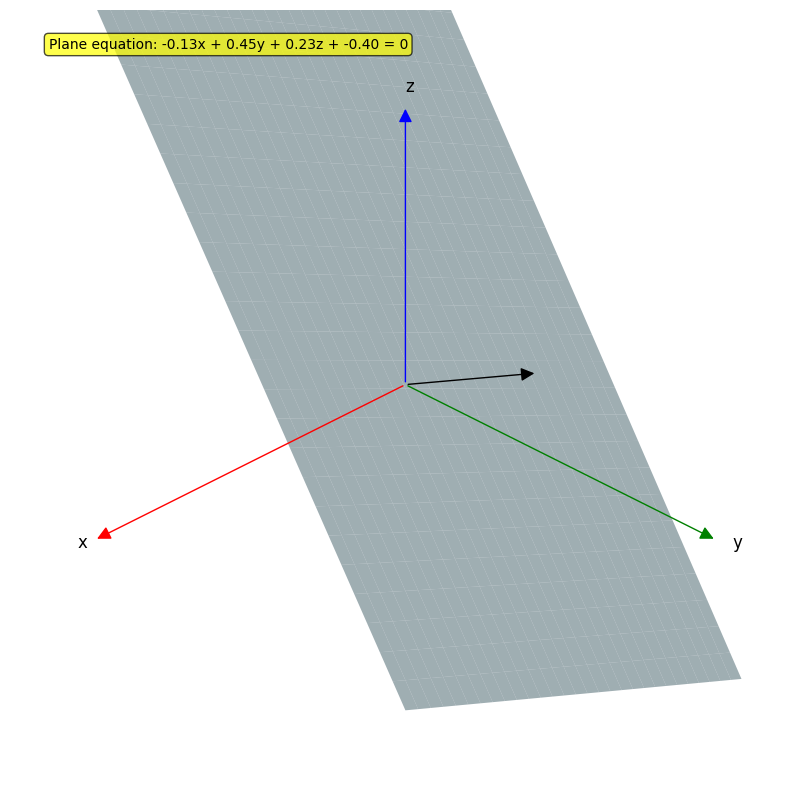

In [97]:
from mpl_toolkits.mplot3d.proj3d import proj_transform
from mpl_toolkits.mplot3d.axes3d import Axes3D
from matplotlib.patches import FancyArrowPatch
import matplotlib.pyplot as plt


class Arrow3D(FancyArrowPatch):
    def __init__(self, vector: list | tuple, origin=(0, 0, 0), *args, **kwargs):
        default_kwargs = {
            'arrowstyle': '-|>',
            'mutation_scale': 20,
        }
        default_kwargs.update(kwargs)
        super().__init__((0, 0), (0, 0), *args, **default_kwargs)
        self._origin = origin
        self._vector = vector

    def draw(self, renderer):
        x1, y1, z1 = self._origin
        dx, dy, dz = self._vector
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)
        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        super().draw(renderer)

    def do_3d_projection(self, renderer=None):
        x1, y1, z1 = self._origin
        dx, dy, dz = self._vector
        x2, y2, z2 = (x1 + dx, y1 + dy, z1 + dz)
        xs, ys, zs = proj_transform((x1, x2), (y1, y2), (z1, z2), self.axes.M)
        self.set_positions((xs[0], ys[0]), (xs[1], ys[1]))
        return np.min(zs)


def draw_arrow_3d(ax: Axes3D, vector: list | tuple, origin=(0, 0, 0), l2_norm: int = None, label: str = None, *args,
                  **kwargs):
    if l2_norm:
        norm = np.sqrt(np.sum([v ** 2 for v in vector]))
        unit = np.array([v / norm for v in vector])
        vector = unit * l2_norm
    arrow = Arrow3D(vector, origin, *args, **kwargs)
    ax.add_artist(arrow)

    if label:
        x = origin[0] + vector[0] * 1.05
        y = origin[1] + vector[1] * 1.05
        z = origin[2] + vector[2] * 1.05
        ax.text(x, y, z, s=label, fontsize=12, color='black')


def draw_plane(ax: Axes3D, a, b, c, d):
    """
    Draw a 2D plane in 3D space with its normal vector.

    Plane equation: ax + by + cz + d = 0
    
    Parameters:
    -----------
    a, b, c, d: float
    """

    x = np.linspace(-3, 3, 30)
    y = np.linspace(-3, 3, 30)
    X, Y = np.meshgrid(x, y)
    Z = (-d - a * X - b * Y) / c
    ax.plot_surface(X, Y, Z, alpha=0.6, color='lightblue',
                    edgecolor='none', label='Plane')


fig = plt.figure(figsize=(10, 8))
ax: Axes3D = fig.add_subplot(111, projection='3d')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(-3, 3)
ax.set_axis_off()
ax.view_init(elev=30, azim=45, roll=0)

coef = W.tolist()

draw_plane(ax, *coef, b[0])
draw_arrow_3d(ax, vector=coef, l2_norm=2, color='black')
draw_arrow_3d(ax, vector=(1, 0, 0), l2_norm=5, color='red', label='x')
draw_arrow_3d(ax, vector=(0, 1, 0), l2_norm=5, color='green', label='y')
draw_arrow_3d(ax, vector=(0, 0, 1), l2_norm=5, color='blue', label='z')

equation = f'Plane equation: {coef[0]:.2f}x + {coef[1]:.2f}y + {coef[2]:.2f}z + {b[0]:.2f} = 0'
ax.text2D(0.05, 0.95, equation, transform=ax.transAxes, fontsize=10,
          bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))
plt.tight_layout()
plt.show()

## Multi-layer Perceptron

선형분리가 불가능한 데이터는 퍼셉트론을 사용해도 구분할 수 없다.

퍼셉트론을 여러겹 쌓아올린다면 비선형 데이터를 처리할 수 있을까?

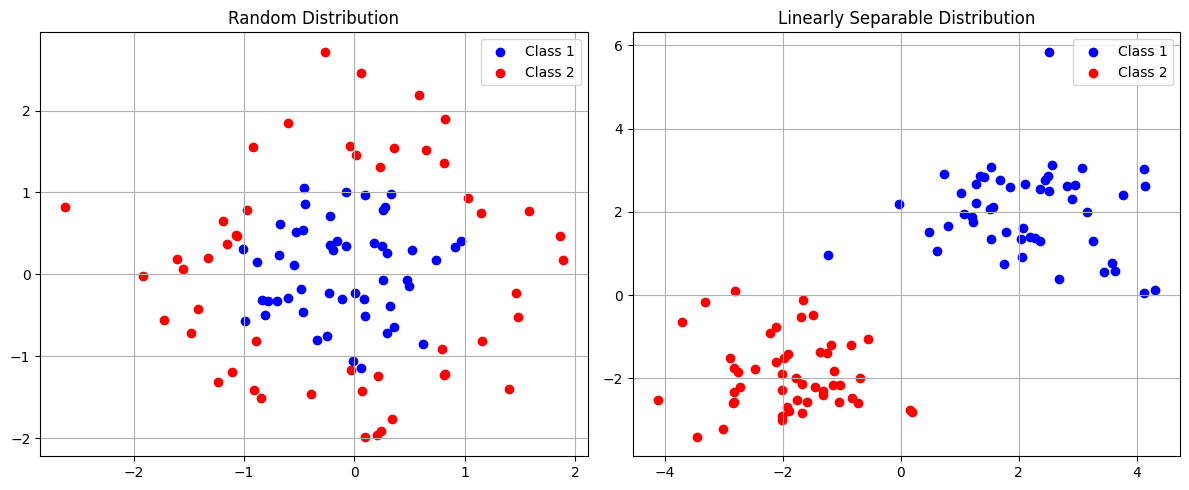

In [98]:
import numpy as np
import matplotlib.pyplot as plt

# Random/stochastic dataset
np.random.seed(42)
n_samples = 100

# Generate points from gaussian distribution
X = np.random.randn(n_samples, 2)

# Find distances from center (0,0)
distances = np.sqrt(np.sum(X ** 2, axis=1))

# Get indices of 50 points closest to center
n_closer = int(n_samples / 2)
closest_indices = np.argsort(distances)[:n_closer]
other_indices = np.argsort(distances)[n_closer:]

# Split into classes based on distance from center
X1_class1 = X[closest_indices]
X1_class2 = X[other_indices]

# Generate linearly separable points for second dataset
X2_class1 = np.random.randn(n_samples // 2, 2) + np.array([2, 2])
X2_class2 = np.random.randn(n_samples // 2, 2) - np.array([2, 2])

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot first dataset
ax1.scatter(X1_class1[:, 0], X1_class1[:, 1], c='blue', label='Class 1')
ax1.scatter(X1_class2[:, 0], X1_class2[:, 1], c='red', label='Class 2')
ax1.set_title('Random Distribution')
ax1.legend()
ax1.grid(True)

# Plot second dataset
ax2.scatter(X2_class1[:, 0], X2_class1[:, 1], c='blue', label='Class 1')
ax2.scatter(X2_class2[:, 0], X2_class2[:, 1], c='red', label='Class 2')
ax2.set_title('Linearly Separable Distribution')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


10층으로 쌓은 다층 퍼셉트론으로 데이터 라벨을 구분해보자.

In [99]:
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler

# Combine the two classes into features X and labels y
X_train = np.vstack([X1_class1, X1_class2])
y_train = np.hstack([np.zeros(len(X1_class1)), np.ones(len(X1_class2))])

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Train MLP
mlp = MLPClassifier(
    hidden_layer_sizes=(10,), random_state=42, max_iter=1000,
    activation='identity'
)
mlp.fit(X_train_scaled, y_train)

,hidden_layer_sizes,"(10,)"
,activation,'identity'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


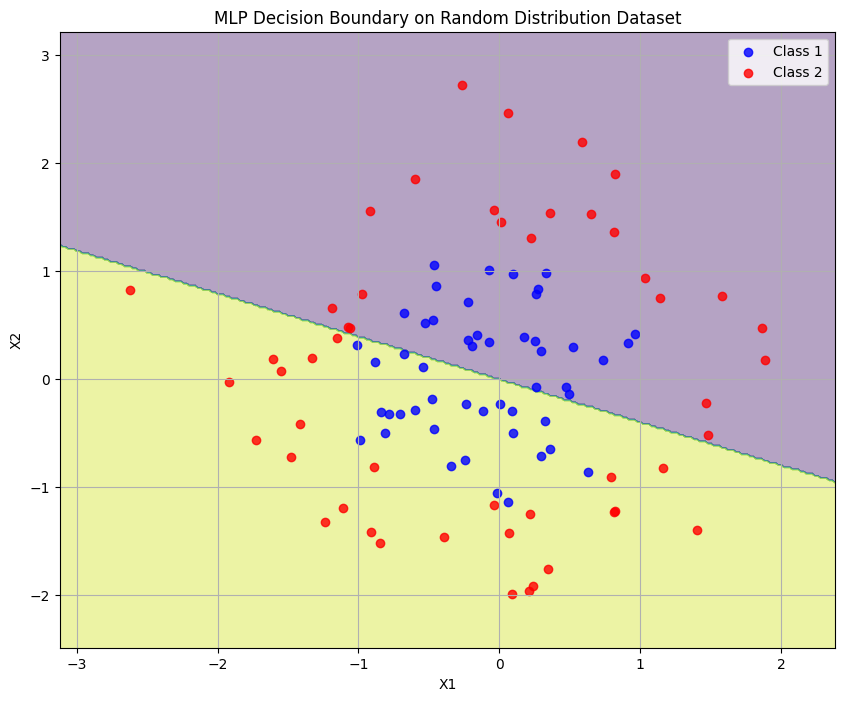

In [100]:
def visualize_classifier(cls: MLPClassifier, X_train, X_class1, X_class2):
    # Create a mesh grid to plot decision boundary
    x_min, x_max = X_train[:, 0].min() - 0.5, X_train[:, 0].max() + 0.5
    y_min, y_max = X_train[:, 1].min() - 0.5, X_train[:, 1].max() + 0.5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Scale the mesh grid points
    mesh_points = np.c_[xx.ravel(), yy.ravel()]
    mesh_points_scaled = scaler.transform(mesh_points)
    Z = mlp.predict(mesh_points_scaled)
    Z = Z.reshape(xx.shape)

    # Plot
    plt.figure(figsize=(10, 8))
    plt.contourf(xx, yy, Z, alpha=0.4)
    plt.scatter(X_class1[:, 0], X_class1[:, 1], color='blue', label='Class 1', alpha=0.8)
    plt.scatter(X_class2[:, 0], X_class2[:, 1], color='red', label='Class 2', alpha=0.8)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.title('MLP Decision Boundary on Random Distribution Dataset')
    plt.legend()
    plt.grid(True)
    plt.show()


visualize_classifier(mlp, X_train, X1_class1, X1_class2)

In [101]:
print(f"Training accuracy: {mlp.score(X_train_scaled, y_train):.4f}")


Training accuracy: 0.5200


퍼셉트론을 여러겹 쌓아도 비선형 데이터를 구분하지 못한다!

같은 조건에서 활성함수 ReLU를 도입하고 다시 시도해보자.

In [102]:
mlp = MLPClassifier(
    hidden_layer_sizes=(10,), random_state=42, max_iter=1000,
    activation='relu'
)
mlp.fit(X_train_scaled, y_train)

C:\Users\CYP\PycharmProjects\ai-sanbox\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:780: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


,hidden_layer_sizes,"(10,)"
,activation,'relu'
,solver,'adam'
,alpha,0.0001
,batch_size,'auto'
,learning_rate,'constant'
,learning_rate_init,0.001
,power_t,0.5
,max_iter,1000
,shuffle,True
,random_state,42


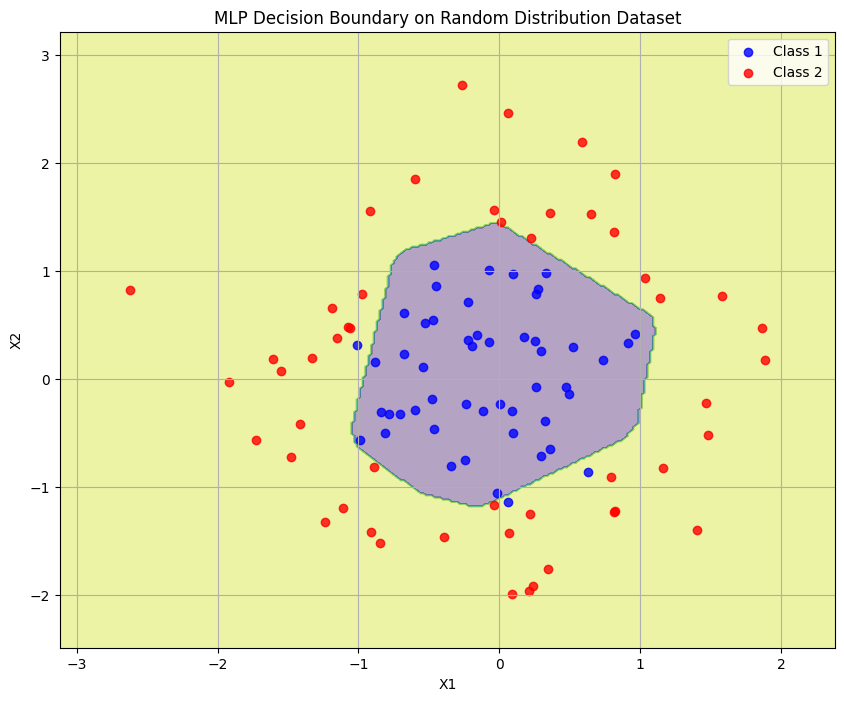

In [103]:
visualize_classifier(mlp, X_train, X1_class1, X1_class2)

In [104]:
print(f"Training accuracy: {mlp.score(X_train_scaled, y_train):.4f}")

Training accuracy: 0.9700


## Activation function
특성 공간을 변환하는 과정에서 비선형 연산을 제공하는 것이 바로 활성함수이다.

$$
\begin{align*}
\mathbf{z} &= \mathbf{w}^\intercal \mathbf{x} + b
\\\
y &= \phi(\mathbf{z}) = \text{ReLU}(\mathbf{z})
\end{align*}
$$